In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
latest_date

'2017-08-23'

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_date = dt.date(2017,8,23) - dt.timedelta(days=365)
one_year_date

# Perform a query to retrieve the data and precipitation scores
precip_results = session.query(Measurement.date, func.avg(Measurement.prcp)).\
                    filter(Measurement.date >= one_year_date).\
                    group_by(Measurement.date).all()
precip_results
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip_results, columns=['Date', 'Precipitation'])
precip_df.set_index('Date', inplace=True)
precip_df.head()

,Precipitation
Date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000


<function matplotlib.pyplot.show(close=None, block=None)>

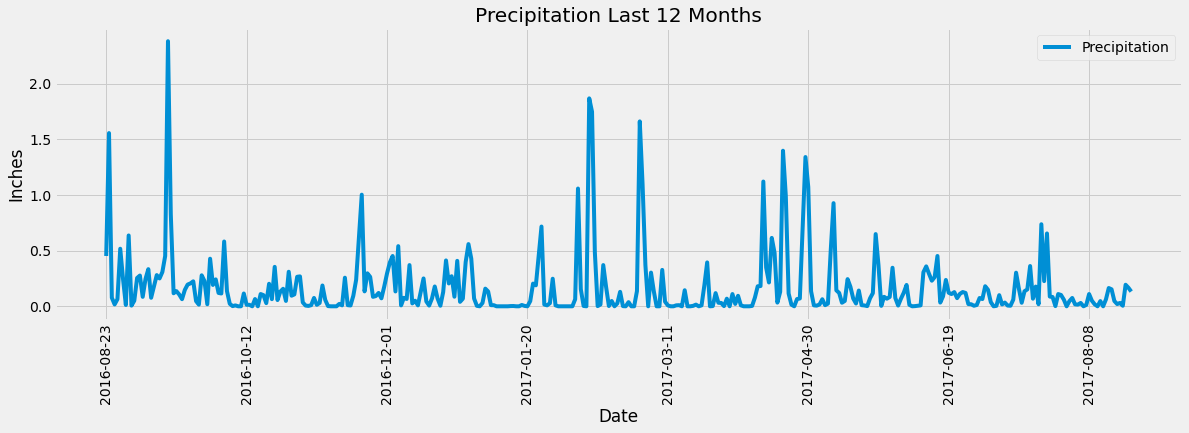

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(title="Precipitation Last 12 Months", figsize=(18,5))
plt.legend(loc='upper right')
plt.xticks(rotation = 90) 
plt.ylabel("Inches")
plt.savefig("Images/precipitation.png")
plt.show

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
station_total = session.query(Measurement.station).distinct().count()
station_total

9

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]

min_max_avg_temp = session.query(*sel).\
    filter(Measurement.station == "USC00519281").all()
min_max_avg_temp

[(54.0, 85.0, 71.66378066378067)]

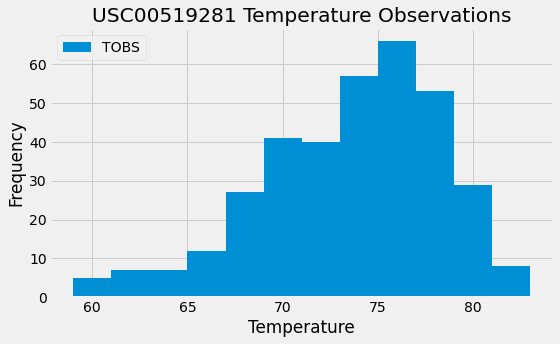

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(Measurement.tobs).\
    filter(Measurement.date >= one_year_date).\
    filter(Measurement.station == "USC00519281").\
    order_by(Measurement.date).all()
# Save query as dataframe
tobs_df = pd.DataFrame(tobs_data, columns=["TOBS"])

# Plot the results as a histogram
tobs_df.plot.hist(title="USC00519281 Temperature Observations", bins=12, figsize=(8,5))
plt.xlabel("Temperature")
plt.legend(loc="upper left")
plt.tight_layout()
plt.savefig("Images/station-histogram.png")
plt.show()

# Close session

In [17]:
# Close Session
session.close()